# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

---
## Step 0: Load The Data

In [27]:
# Load pickled data
import pickle

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file =  'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set

In [2]:
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


The file `signnames.csv` contains the full labels. Let's see what're those labels.

In [3]:
import pandas as pd
sign_names = pd.read_csv("signnames.csv").values[:, 1]
print(sign_names)

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road' 'Slippery road'
 'Road narrows on the right' 'Road work' 'Traffic signals' 'Pedestrians'
 'Children crossing' 'Bicycles crossing' 'Beware of ice/snow'
 'Wild animals crossing' 'End of all speed and passing limits'
 'Turn right ahead' 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric tons']


### Visualize the Data Set

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's plot 10 random images within each of the 43 classes to get a sense of what those images look like

In [28]:
# Get unique labels and counts from training set
sign_classes, class_indices, class_counts = np.unique(y_train, return_index=True, return_counts=True)

Class 0: Speed limit (20km/h), with 180 samples


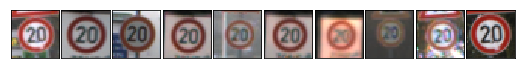


Class 1: Speed limit (30km/h), with 1980 samples


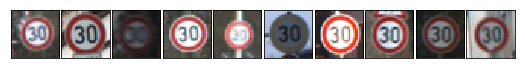


Class 2: Speed limit (50km/h), with 2010 samples


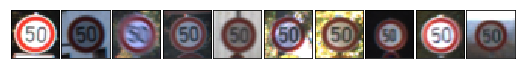


Class 3: Speed limit (60km/h), with 1260 samples


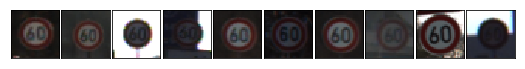


Class 4: Speed limit (70km/h), with 1770 samples


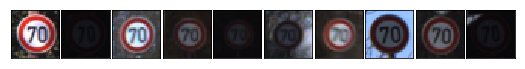


Class 5: Speed limit (80km/h), with 1650 samples


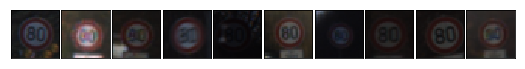


Class 6: End of speed limit (80km/h), with 360 samples


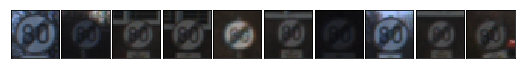


Class 7: Speed limit (100km/h), with 1290 samples


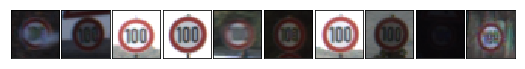


Class 8: Speed limit (120km/h), with 1260 samples


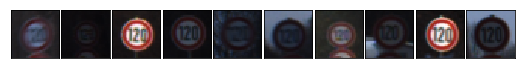


Class 9: No passing, with 1320 samples


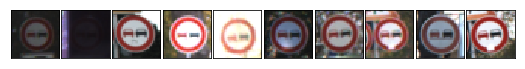


Class 10: No passing for vehicles over 3.5 metric tons, with 1800 samples


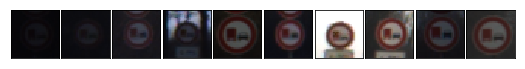


Class 11: Right-of-way at the next intersection, with 1170 samples


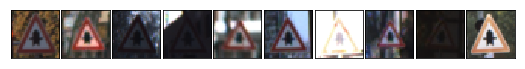


Class 12: Priority road, with 1890 samples


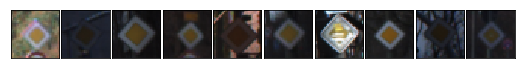


Class 13: Yield, with 1920 samples


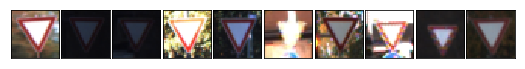


Class 14: Stop, with 690 samples


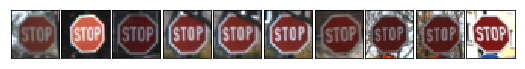


Class 15: No vehicles, with 540 samples


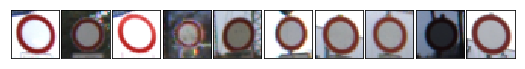


Class 16: Vehicles over 3.5 metric tons prohibited, with 360 samples


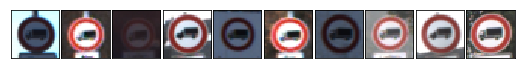


Class 17: No entry, with 990 samples


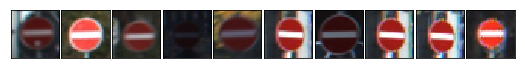


Class 18: General caution, with 1080 samples


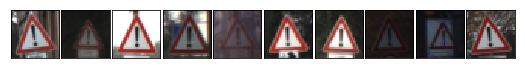


Class 19: Dangerous curve to the left, with 180 samples


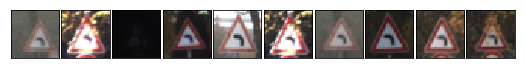


Class 20: Dangerous curve to the right, with 300 samples


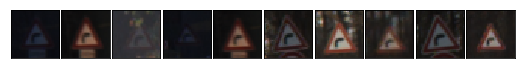


Class 21: Double curve, with 270 samples


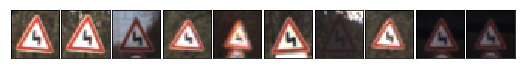


Class 22: Bumpy road, with 330 samples


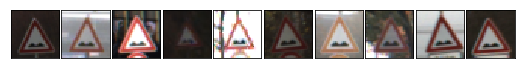


Class 23: Slippery road, with 450 samples


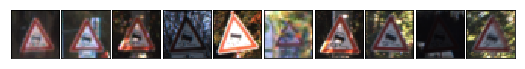


Class 24: Road narrows on the right, with 240 samples


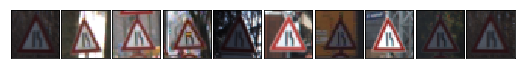


Class 25: Road work, with 1350 samples


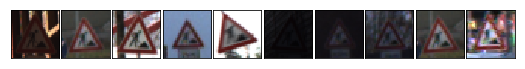


Class 26: Traffic signals, with 540 samples


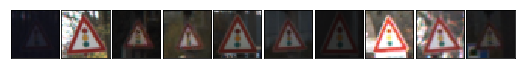


Class 27: Pedestrians, with 210 samples


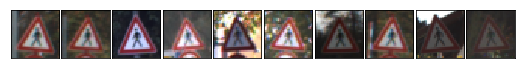


Class 28: Children crossing, with 480 samples


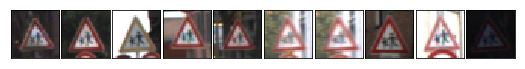


Class 29: Bicycles crossing, with 240 samples


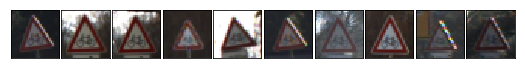


Class 30: Beware of ice/snow, with 390 samples


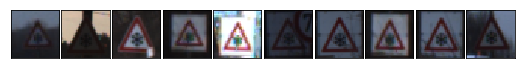


Class 31: Wild animals crossing, with 690 samples


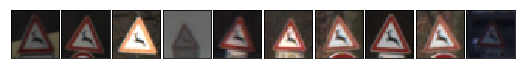


Class 32: End of all speed and passing limits, with 210 samples


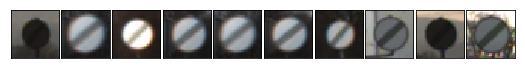


Class 33: Turn right ahead, with 599 samples


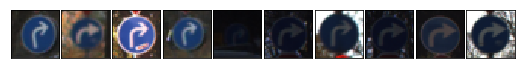


Class 34: Turn left ahead, with 360 samples


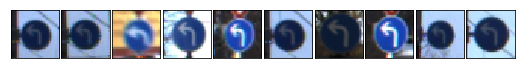


Class 35: Ahead only, with 1080 samples


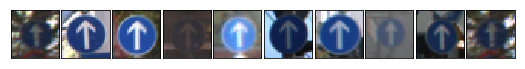


Class 36: Go straight or right, with 330 samples


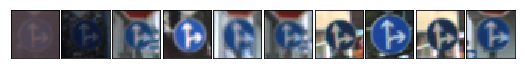


Class 37: Go straight or left, with 180 samples


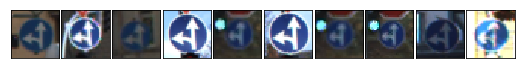


Class 38: Keep right, with 1860 samples


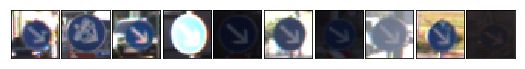


Class 39: Keep left, with 270 samples


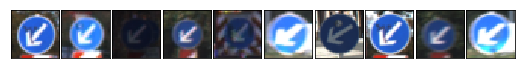


Class 40: Roundabout mandatory, with 300 samples


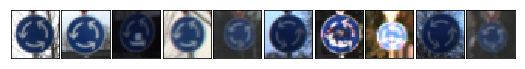


Class 41: End of no passing, with 210 samples


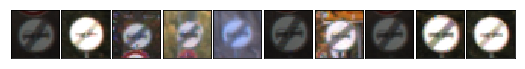


Class 42: End of no passing by vehicles over 3.5 metric tons, with 210 samples


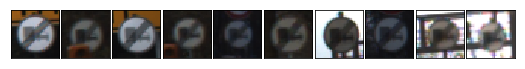

In [6]:
import random

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class {}: {}, with {} samples".format(c, sign_names[c], str(c_count)))
    fig = plt.figure(figsize = (7, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    plt.show()
    print()

The images have different brightness and angles. Some are even too dark to recognize. Let's see how the labels distribute. 

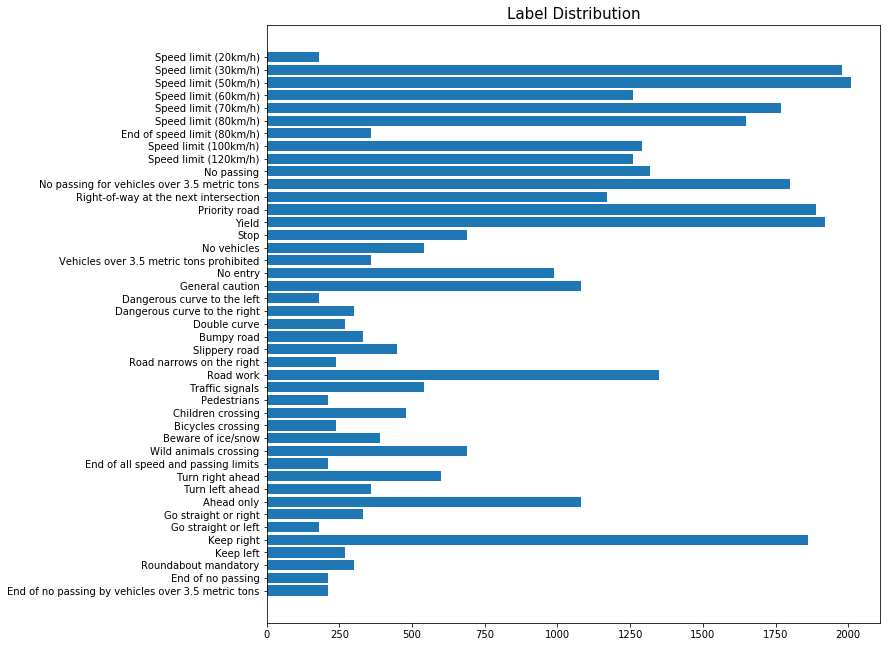

In [7]:
plt.figure(figsize = (11, 11))
plt.barh(np.arange(43), class_counts)
ax = plt.gca()
ax.invert_yaxis()
plt.title("Label Distribution", size=15)
ax.set_yticks(range(43))
ax.set_yticklabels(sign_names)
plt.show()

Apparently the data is unbalanced. Some labels are underrepresented like the first one. This may be caused by the bias occured during data collection or the bias in the real world. For example, German is a right-hand-drive country. So the sign "Keep right" is probably more common to be seen than "Keep left". 

In our case, we want the mode to be able to recognize every traffic sign well. So ideally the data should be balanced. So we need to do some data augmentation work here. I found three types of unbalanced label.

- Type 1: some signs are just caused by the inherent bias of the data, such as **Class 0: Speed limit (20km/h)**
- Type 2: some signs are flip invariant, such as **Class 35: Ahead only**
- Type 3: some signs can be flipped and become other valid signs, such as **Class 33: Turn right ahead** and **Class 34: Turn left ahead**


----

## Step 2: Design and Test a Model Architecture

#### Data augmentation

In [29]:
import cv2

def augment(img, ang_range, shear_range, trans_range):
    '''
    This function transforms images to generate a new image

    Input:
        img: the image
        ang_range: range of angles for rotation
        shear_range: range of values to apply affine transform to
        trans_range: range of values to apply translations over.
    
    Output:
        img: the transformed image
    '''

    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    return img

In [30]:
# For those classes that have less than 1000, augment 500 to each
classes_need_augmentation = [0, 6, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 
                             26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 39, 
                             40, 41, 42]

def extend_data(X, y):
    '''
    This function extends the data set to contain transformed images

    Input:
        X: images
        y: labels
    
    Output:
        X: augmented images
        y: augmented labels
    '''

    augmented_images = []
    augmented_labels = []
    
    for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
        if c in classes_need_augmentation:
            # random select 500 images from the class to transform
            random_indices = [random.choice(range(c_index, c_index + c_count)) for _ in range(500)]
            for i in random_indices:
                # augment
                augmented_images.append(augment(X[i], 20, 10, 5))
                augmented_labels.append(c)
            X = np.append(X, augmented_images, axis=0)
            y = np.append(y, augmented_labels, axis=0)
    return X, y

X_train_augmented, y_train_augmented = extend_data(X_train, y_train)

In [31]:
print(X_train_augmented.shape)
print(y_train_augmented.shape)

(223799, 32, 32, 3)
(223799,)


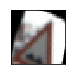

In [54]:
# Display random images to see what the transform looks like
random_index = random.choice(range(X_train_augmented.shape[0]))
selected_X = X_train_augmented[random_index]

fig = plt.figure(figsize=(3, 1))
axis = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
axis.imshow(selected_X)
plt.show()

#### Preprocess the Data Set (normalization & histogram localization, etc.)

Histogram equalization here is to help with those over or under-exposed images.

In [33]:
# Preprocessing
from sklearn.utils import shuffle
from skimage import exposure

def preprocess(X, y):
    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
      
    # Apply histogram equalization  
    for i in range(X.shape[0]):
        X[i] = exposure.equalize_adapthist(X[i])

    return X, y

In [34]:
# Process the data
X_train, y_train = preprocess(X_train_augmented, y_train_augmented)
X_valid, y_valid = preprocess(X_valid, y_valid)
X_test, y_test = preprocess(X_test, y_test)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


### Model Architecture

In [37]:
import tensorflow as tf

EPOCHS = 80
BATCH_SIZE = 128
DROPOUT = 0.75

In [36]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, DROPOUT)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, DROPOUT)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [41]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [42]:
learning_rate = 0.001

logits = LeNet(x)
softmax_prob = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [43]:
# Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [44]:
# Train

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: DROPOUT})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.687

EPOCH 2 ...
Validation Accuracy = 0.770

EPOCH 3 ...
Validation Accuracy = 0.802

EPOCH 4 ...
Validation Accuracy = 0.822

EPOCH 5 ...
Validation Accuracy = 0.848

EPOCH 6 ...
Validation Accuracy = 0.855

EPOCH 7 ...
Validation Accuracy = 0.856

EPOCH 8 ...
Validation Accuracy = 0.859

EPOCH 9 ...
Validation Accuracy = 0.872

EPOCH 10 ...
Validation Accuracy = 0.872

EPOCH 11 ...
Validation Accuracy = 0.871

EPOCH 12 ...
Validation Accuracy = 0.878

EPOCH 13 ...
Validation Accuracy = 0.886

EPOCH 14 ...
Validation Accuracy = 0.879

EPOCH 15 ...
Validation Accuracy = 0.893

EPOCH 16 ...
Validation Accuracy = 0.889

EPOCH 17 ...
Validation Accuracy = 0.891

EPOCH 18 ...
Validation Accuracy = 0.894

EPOCH 19 ...
Validation Accuracy = 0.891

EPOCH 20 ...
Validation Accuracy = 0.895

EPOCH 21 ...
Validation Accuracy = 0.892

EPOCH 22 ...
Validation Accuracy = 0.892

EPOCH 23 ...
Validation Accuracy = 0.898

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 3)


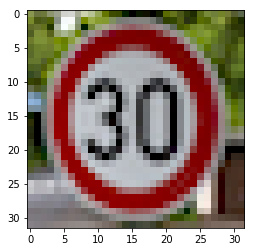

(32, 32, 3)


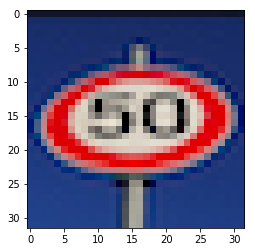

(32, 32, 3)


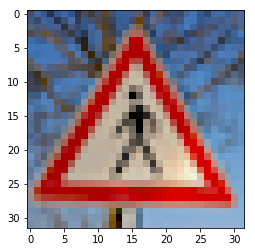

(32, 32, 3)


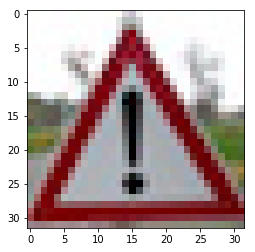

(32, 32, 3)


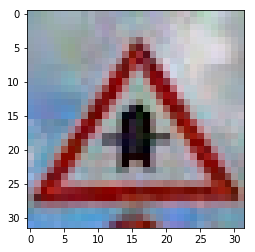

In [46]:
### Load the images and plot them here.
import matplotlib.image as mpimg

imgs = ['30.jpg', '50.jpg', 'pedestrians.jpg', 'general_caution.jpg', 'right_of_way.jpg']

new_input = []
new_y = np.array([1, 2, 27, 18, 11])

for imgname in imgs:
    image = mpimg.imread('data/' + imgname)
    new_input.append(image)
    print(image.shape)
    plt.imshow(image)
    plt.show()

### Predict the Sign Type for Each Image

In [55]:
### Run the predictions here and use the model to output the prediction for each image.
X_new, y_new = preprocess(np.array(new_input), new_y)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [76]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    classification = sess.run(tf.nn.top_k(softmax_prob, k=5), feed_dict={x: X_new, keep_prob: 1.})
    for i, (labels, values) in enumerate(zip(classification.indices, classification.values)):
        print("{}. ".format(i+1))
        for label, prob in zip(labels, values):
            print("Predict label: {} with probability {:.2}".format(label, prob))

1. 
Predict label: 1 with probability 0.95
Predict label: 2 with probability 0.038
Predict label: 4 with probability 0.011
Predict label: 0 with probability 0.00084
Predict label: 5 with probability 4.7e-06
2. 
Predict label: 7 with probability 1.0
Predict label: 1 with probability 0.0011
Predict label: 11 with probability 0.00077
Predict label: 13 with probability 0.00019
Predict label: 42 with probability 0.00019
3. 
Predict label: 27 with probability 1.0
Predict label: 26 with probability 2.2e-08
Predict label: 18 with probability 1.1e-11
Predict label: 21 with probability 1.9e-19
Predict label: 25 with probability 9.7e-20
4. 
Predict label: 24 with probability 1.0
Predict label: 18 with probability 1.8e-07
Predict label: 28 with probability 1.2e-07
Predict label: 27 with probability 7.9e-08
Predict label: 11 with probability 2.8e-10
5. 
Predict label: 24 with probability 0.79
Predict label: 11 with probability 0.21
Predict label: 30 with probability 0.0054
Predict label: 21 with pr

### Analyze Performance

The top 5 prediction with probabilities are shown above. The model predicts `[1, 7, 27, 24, 24]` and the correct labels are: `[1, 2, 27, 18, 11]` respectively. The model has 40% accuracy.